In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\billo\Documents\GitHub\Unit 5 Labs\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")

## Part 1: Understanding Product Categories



Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

The most popular product categories on Amazon UK are sports & outdoors, beauty handmade clothing, shoes and accessoried, bath and body and birthday gifts. 
In terms of listing the most listed product category is sports and outdoors with 836,265 listings. 

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

Top 5 most listed products:

1. Sports & Outdoors                         
2. Beauty                                     
3. Handmade Clothing, Shoes & Accessories     
4. Bath & Body                                
5. Birthday Gifts  




In [4]:
df


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
frequency_table = df['category'].value_counts().head(5)
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

Visualizations:

Display the distribution of products across different categories using a bar chart. 

If you face problems understanding the chart, do it for a subset of top categories.

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts')])

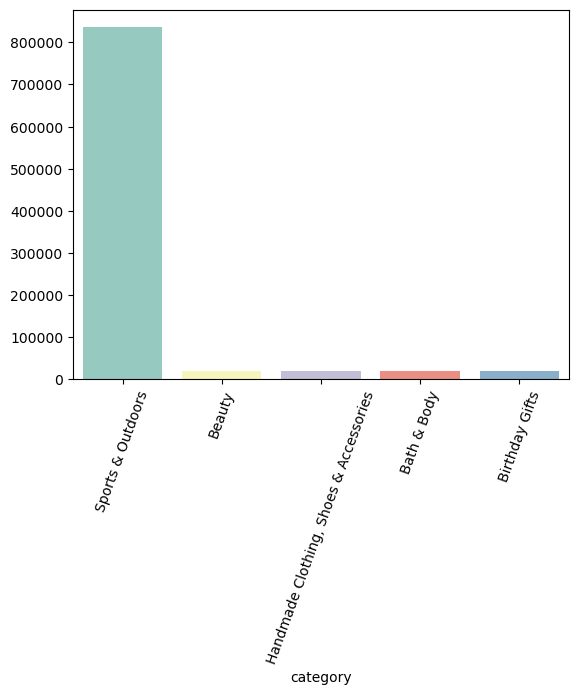

In [7]:
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");
plt.xticks(rotation=70)


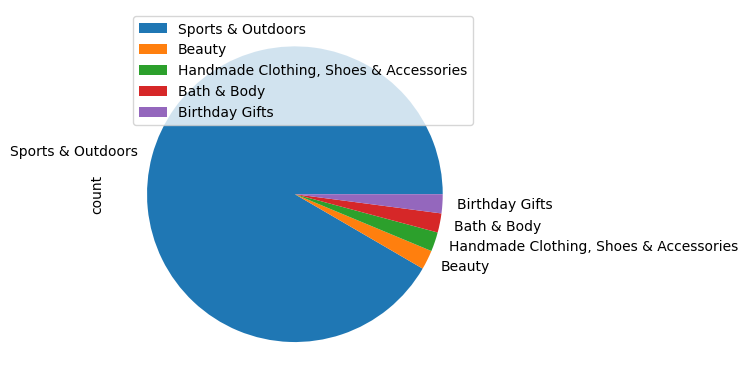

In [10]:
frequency_table.plot.pie(y='count')
plt.legend()

## Part 2: Delving into Product Pricing


Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

The average price point of products listed is $89.24.

This price is much higer than the most common price point which is $9.99.

In [38]:
df['price'].mean()

89.24380943923663

In [39]:
df['price'].median()

19.09

In [36]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

The product prices are varied, I guess depending on the product category. 

Their is a significant spred in prices seeing that the range_price is $100,000.00

In [40]:
df['price'].var()

119445.48532256528

In [41]:
df['price'].std()

345.60886175352226

In [42]:
range_price = df['price'].max()-df['price'].min()
range_price

100000.0

In [12]:
IQR = df['price'].quantile(0.75)- df['price'].quantile(0.25)
IQR

36.0

Visualizations:

Is there a specific price range where most products fall? 
Plot a histogram to visualize the distribution of product prices. 

If its hard to read these diagrams, think why this is, and explain how it could be solved.

Are there products that are priced significantly higher than the rest? 
Use a box plot to showcase the spread and potential outliers in product pricing.

<Axes: >

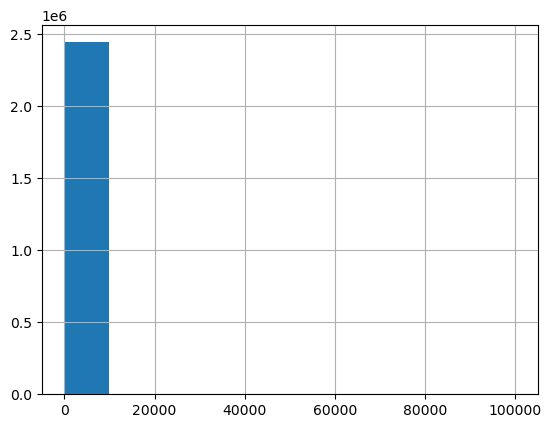

In [17]:
df['price'].hist()

<Axes: >

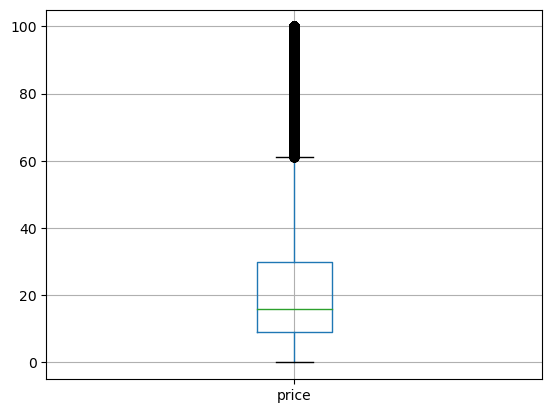

In [16]:
df.query('price<100').boxplot(column = ['price'])

## Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

Seeing this data we can infer that most of the customer dont rate products or if they do is only when the product is bad or defective. 

In [48]:
df['stars'].mean()

2.152836472966065

In [49]:
df['stars'].median()

0.0

In [50]:
df['stars'].mode()

0    0.0
Name: stars, dtype: float64

Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

Their is a wide variation on the customer feedback for waht we can se in the data. 

In [51]:
df['stars'].var()

4.81743402976196

In [52]:
df['stars'].std()

2.1948653785054697

In [53]:
range_ratings = df['stars'].max()-df['stars'].min()
range_ratings

5.0

In [13]:
IQR = df['stars'].quantile( 0.75)-df['stars'].quantile( 0.25)
IQR

4.4

Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

The ratings mostly lean torwards lower values. 

In [56]:
skewness_ratings = df['stars'].skew()
skewness_ratings

0.08120735761080985

In [57]:
kurtosis_ratings = df['stars'].kurtosis()
kurtosis_ratings

-1.9260061280432985

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

No rating is the most common, but also 5.00 is second. 

<Axes: xlabel='stars', ylabel='Count'>

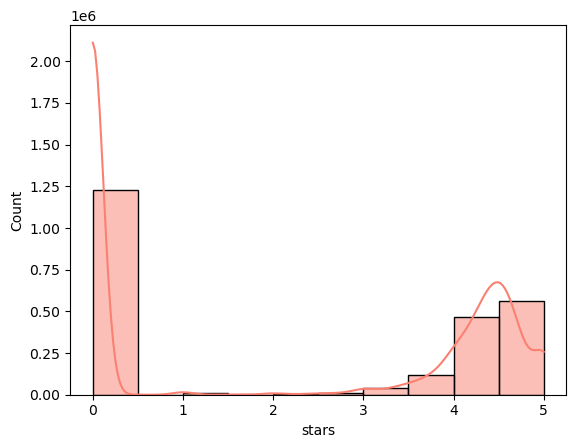

In [60]:
sns.histplot(df['stars'], kde=True, bins=10, color="salmon")